In [1]:
#import basic python packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm, skew 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


# **Data import & Data information**




In [2]:
#import training set & test set from csv file
df_train = pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
#print shape of the training set & test set 
print("Training set shape:{}\n".format(df_train.shape))
print("Test set shape:{}".format(df_test.shape))

Training set shape:(1460, 81)

Test set shape:(1459, 80)


In [4]:
#show the first 5 rows in training set
#including target 'SalePrice' 
df_train.head(5)  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#show the first 5 rows in test set
#no label column in test set
df_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
#show all column names in training set
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
#info about the target 'Saleprice'
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# **Data Visualization**

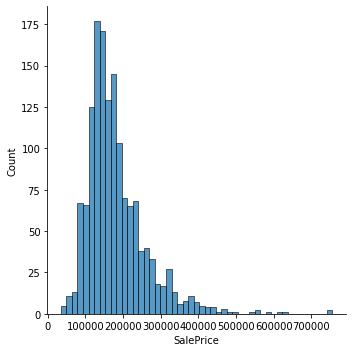

In [8]:
#Using sns.displot to show the histogram bar of "SalePrice"
#Most data follow the principle of normal distribution.
sns.displot(df_train['SalePrice'])

In [9]:
#calculate the skewness and kurtosis of "SalePrice" 
print('skewness: %f' % df_train['SalePrice'].skew())
print('kurtosis: %f' % df_train['SalePrice'].kurt())


skewness: 1.882876
kurtosis: 6.536282


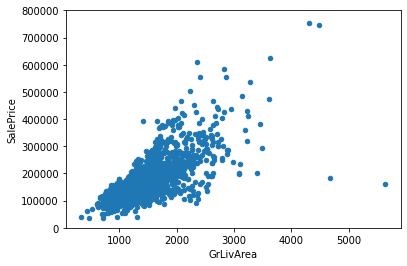

In [10]:
#Plot some continuous-value features 
# to see their impact on SalePrice

#1.Liveing Area & SalePrice
#to see the impact of living space on housing prices

var = 'GrLivArea'
area = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
area.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

**It is roughly in line with the trend that the larger the house area, the more expensive the price, but there are some outliers that need to be dealt with.**

# **Feature Engineering**

## Preprocessing

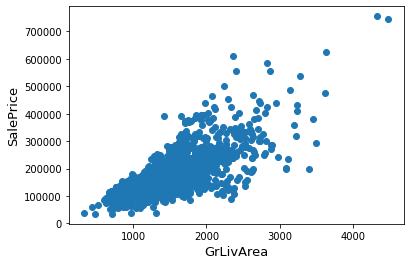

In [11]:
#Drop the 2 outliers in the right corner
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

#Check the graph after removing outliers
fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

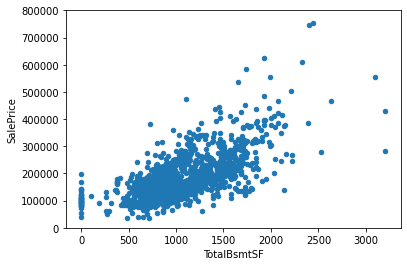

In [12]:
#2.TotalBasementArea & SalePrice
var = 'TotalBsmtSF'
area = pd.concat([df_train['TotalBsmtSF'],df_train['SalePrice']], axis=1)
area.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

In [13]:
# Since GrlivArea and TotalBsmtSF have the same outliers, we do not need to drop them again, so We commented this part
# df_train = df_train.drop(df_train[(df_train['TotalBsmtSF']>4000) & (df_train['SalePrice']>100000)].index)

# #Check the graphic again
# fig, ax = plt.subplots()
# ax.scatter(df_train['TotalBsmtSF'], df_train['SalePrice'])
# plt.ylabel('SalePrice', fontsize=13)
# plt.xlabel('TotalBsmtSF', fontsize=13)
# plt.show()

In [14]:
df_train['OverallQual'].describe()

count    1458.000000
mean        6.093964
std         1.376369
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

(-0.5, 9.5, 0.0, 800000.0)

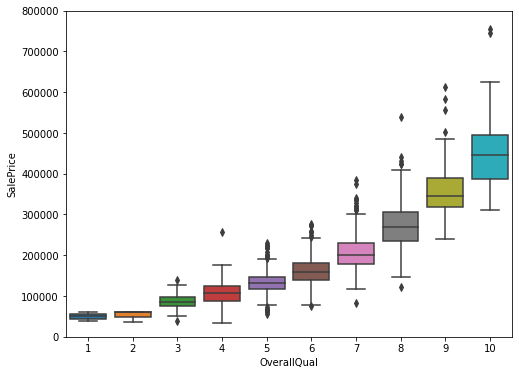

In [15]:
#Box plot of overall quality vs sale price
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6)) 
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)

(-0.5, 111.5, 0.0, 800000.0)

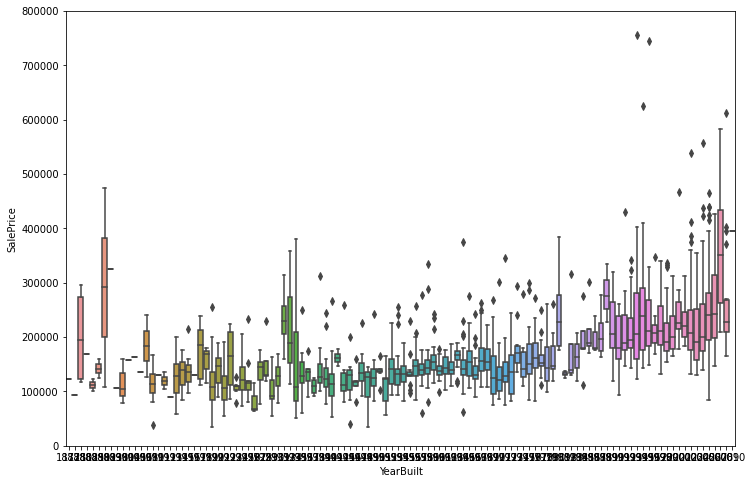

In [16]:
#year built vs sale ,newer buildings are usually higher priced than older with some outlier
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8)) 
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)

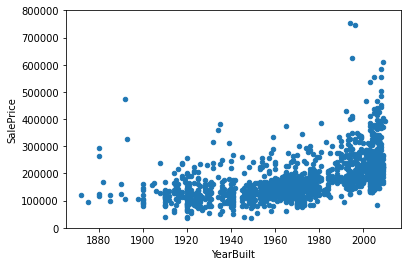

In [17]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice',ylim=(0, 800000))

----------Data Visualization------------

---

Use Box Cox tranformation to deal with the features with big skewness


 mu = 180932.92 and sigma = 79467.79



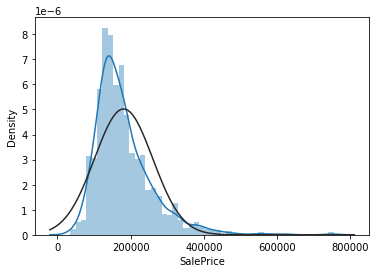

In [18]:
#show the density of the SalePrice
sns.distplot(df_train['SalePrice'] , fit=norm)
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


 mu = 12.02 and sigma = 0.40



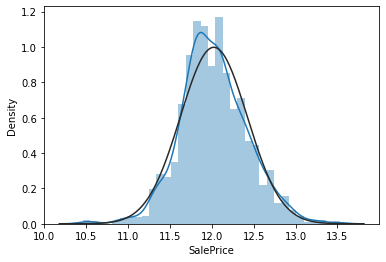

In [19]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df_train["SalePrice"] = np.log1p(df_train["SalePrice"]) #Use log(1+x) to reduce skewness


#Check the new distribution 
sns.distplot(df_train['SalePrice'] , fit=norm)


(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

--------------Reduce skewness to make it normally distributed -----------------

----------------missing values fill-in-----------------------------

## Missing values fill-in

In [20]:
#Add the train and test data together
ntrain = df_train.shape[0]
print(ntrain)

ntest = df_test.shape[0]
print(ntest)

# y_train = pd.read_csv('train.csv')['SalePrice']
y = df_train['SalePrice']
total_data = pd.concat((df_train, df_test)).reset_index(drop=True)
total_data.drop(['SalePrice'], axis=1, inplace=True)
print("total_data size is : {}".format(total_data.shape))

# total_data.shape
total_data = total_data.drop('Id', axis=1)
total_data.head(5)

y.head()
y.shape

1458
1459
total_data size is : (2917, 80)


(1458,)

In [21]:
#determine how much of the feture consist of null value in percentage
total = total_data.isnull().sum().sort_values(ascending=False)
percent = (total_data.isnull().sum()/total_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
PoolQC,2908,0.996915
MiscFeature,2812,0.964004
Alley,2719,0.932122
Fence,2346,0.804251
FireplaceQu,1420,0.486802
LotFrontage,486,0.166610
GarageCond,159,0.054508
GarageQual,159,0.054508
GarageYrBlt,159,0.054508
GarageFinish,159,0.054508


In [22]:
#check what features are with null value,and how many 
df_missing = pd.DataFrame(total_data.isnull().sum())
df_missing = df_missing[df_missing[0] > 0]
df_missing

,0
MSZoning,4
LotFrontage,486
Alley,2719
Utilities,2
Exterior1st,1
Exterior2nd,1
MasVnrType,24
MasVnrArea,23
BsmtQual,81
BsmtCond,82


In [23]:
df_missing.index.to_list

<bound method IndexOpsMixin.tolist of Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')>

In [24]:
#fill null value of MSZoning with None
total_data['MSZoning'] = total_data['MSZoning'].fillna("None")

In [25]:
#fill null value of lot frontage with median value because it dosen't make sense for distance of street and house to be zero
total_data['LotFrontage'] = total_data['LotFrontage'].fillna(total_data['LotFrontage'].median())

In [26]:
#fill null value of Alley with None since we dont know where it is
total_data['Alley'] = total_data['Alley'].fillna("None")


In [27]:
#fill null value of Exterior1st and second with the most frequently used category since there have to be a material for exterior
total_data['Exterior1st'] = total_data['Exterior1st'].fillna(total_data['Exterior1st'].mode()[0])
total_data['Exterior2nd'] = total_data['Exterior2nd'].fillna(total_data['Exterior2nd'].mode()[0])

In [28]:
#fill null value of MasVnrType and area with None and zero because we are assuming the house dosen't have Masonry veneer 
total_data['MasVnrType'] = total_data['MasVnrType'].fillna('None')
total_data['MasVnrArea'] = total_data['MasVnrArea'].fillna(0)

In [29]:
#fill null value of garage numeric feature with zero because we are assuming the house dosen't have garage 
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    total_data[col] = total_data[col].fillna(0)

In [30]:
#fill null value of basement with zero because we are assuming the house dosen't have basement

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    total_data[col] = total_data[col].fillna(0)

In [31]:
#fill null value of Electrical with the most frequently used category since there have to be an electrical system
total_data['Electrical'] = total_data['Electrical'].fillna(total_data['Electrical'].mode()[0])

In [32]:
#fill null value of KitchenQual with the most frequently used category since there have to be quality score for it
total_data['KitchenQual'] = total_data['KitchenQual'].fillna(total_data['KitchenQual'].mode()[0])

In [33]:
##fill null value of functional with Typ because kaggle says to do that
total_data["Functional"] = total_data["Functional"].fillna("Typ")

In [34]:
#fill null value of FireplaceQu with None because we are assuming the house dosen't have fireplace
total_data['FireplaceQu'] = total_data['FireplaceQu'].fillna('None')

In [35]:
#fill null value of garage related feature with None,or zero because we are assuming the house dosen't have garage 
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
  total_data[col] = total_data[col].fillna('None')


In [36]:
#fill null value of PoolQC with None since we are assuming the house dosen't have pool
total_data["PoolQC"] = total_data["PoolQC"].fillna("None")

In [37]:
#fill null value of Fence with None since we are assuming the house dosen't have fence
total_data["Fence"] = total_data["Fence"].fillna("None")

In [38]:
#fill null value of MiscFeature with None since we are assuming the house dosen't have miscellaneous feature
total_data["MiscFeature"] = total_data["MiscFeature"].fillna("None")

In [39]:
#fill null value of SaleType with the most frequently used category since there have to be type of sale
total_data['SaleType'] = total_data['SaleType'].fillna(total_data['SaleType'].mode()[0])

In [40]:
#fill null value of categorical feature related to basement with none because we are assuming the house dosen't have basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    total_data[col] = total_data[col].fillna('None')

In [41]:
#check if there are any null value after filling and we kept utilities not filled on purpose in this step
df_missing = pd.DataFrame(total_data.isnull().sum())
df_missing = df_missing[df_missing[0] > 0]
df_missing



,0
Utilities,2


## Box Cox Transformation

In [42]:
numeric_feats = total_data.dtypes[total_data.dtypes != "object"].index

# Check the skewness of all numerical features
skewed_feats = total_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101
BsmtHalfBath,3.929996


In [43]:

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #total_data[feat] += 1
    total_data[feat] = boxcox1p(total_data[feat], lam)

In [44]:
#Output the csv file to keep a backup
total_data.to_csv(r'clean_dataset.csv')

## Categorical values

In [45]:
# ======================== LabelEncoder ======================================== 
# some continuous features should be considered as categorical features
# MSSubClass should be interpreted as the level of the housing condition.
# Label encoder can help normalize labels.(0 to n_classes-1)​
# ==============================================================================

total_data['MSSubClass'] = total_data['MSSubClass'].astype(str)
total_data['YrSold'] = total_data['YrSold'].astype(str)

In [46]:
#using LabelEncoder() method in sklearn.preprocessing
le =  preprocessing.LabelEncoder()
le.fit(total_data['MSSubClass'])
total_data['MSSubClass'] = le.transform(total_data['MSSubClass'])

#MSSubClass is converted into continuous numbers(0 to n_classes-1)​ 
# total_data.MSSubClass 

In [47]:
le.fit(total_data['OverallCond'])
total_data['OverallCond'] = le.transform(total_data['OverallCond'])

#MSSubClass is converted into continuous numbers(0 to n_classes-1)​ 
# total_data.OverallCond

In [48]:
# Find all categorical features in dataset 

#get column_names list
columns_name = total_data.columns.values.tolist()

#obtain Object features list
df_categories = []
for c in columns_name:
  if total_data[c].dtype == 'object':
    df_categories.append(c)

#show object feature names
df_categories

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [49]:
# ================================Encoding manually=============================
#Some quality features should not get_dummies because of the inner rank
#We use data visualization to find the inner ranking of features.
#===============================================================================
#1. plot 
#2. set weights manually

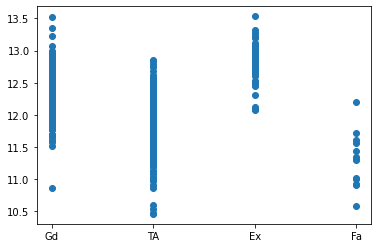

In [50]:
## =============Step 1: plot==============
#plot the scatter graph between ExterQual & SalePrice
plt.scatter(df_train['ExterQual'], df_train['SalePrice'])

#Fa-0 TA-1 Gd-2 Ex-3

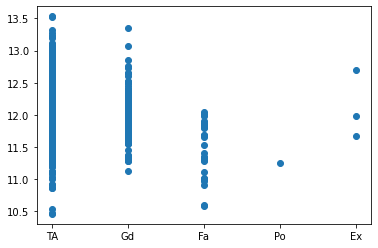

In [51]:
#plot the scatter graph between ExterCond & SalePrice
plt.scatter(df_train['ExterCond'], df_train['SalePrice'])

#Po-0 Fa-0 TA-1 Gd-1 Ex-1

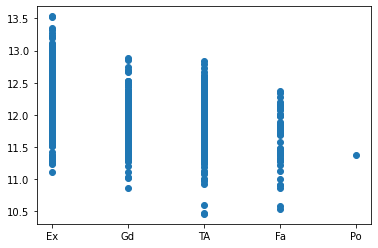

In [52]:
#plot the scatter graph between HeatingQC & SalePrice
plt.scatter(df_train['HeatingQC'], df_train['SalePrice'])

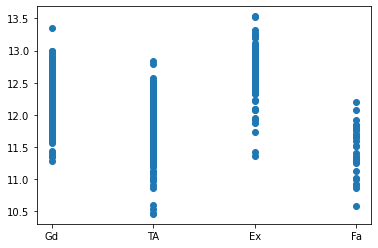

In [53]:
#plot the scatter graph between KitchenQual & SalePrice
plt.scatter(df_train['KitchenQual'], df_train['SalePrice'])

In [54]:
## =============Step 2: set weights manually==============
#ExterQual ExterCond BsmtQual BsmtCond HeatingQC KitchenQual PoolQC

#set ExterQual categories weights
for i in range(total_data.shape[0]):
  if total_data['ExterQual'][i] == "Fa":
    total_data['ExterQual'][i] = 1.0
  if total_data['ExterQual'][i] == "TA":
    total_data['ExterQual'][i] = 2.0
  if total_data['ExterQual'][i] == "Gd":
    total_data['ExterQual'][i] = 3.0
  if total_data['ExterQual'][i] == "Ex":
    total_data['ExterQual'][i] = 4.0
  if total_data['ExterQual'][i] == "None":
    total_data['ExterQual'][i] = 0.0

total_data['ExterQual'] = pd.to_numeric(total_data['ExterQual'])
total_data['ExterQual'].dtype

dtype('float64')

In [55]:
#set ExterCond categories weights

for i in range(total_data.shape[0]):
  if total_data['ExterCond'][i] == "Fa":
    total_data['ExterCond'][i] = 1.0
  if total_data['ExterCond'][i] == "TA":
    total_data['ExterCond'][i] = 2.0
  if total_data['ExterCond'][i] == "Gd":
    total_data['ExterCond'][i] = 2.0
  if total_data['ExterCond'][i] == "Ex":
    total_data['ExterCond'][i] = 2.0
  if total_data['ExterCond'][i] == "Po":
    total_data['ExterCond'][i] = 0.0
  if total_data['ExterCond'][i] == "None":
    total_data['ExterCond'][i] = 0.0

total_data['ExterCond'] = pd.to_numeric(total_data['ExterCond'])
# total_data['ExterCond'].dtype
# total_data['ExterCond']

In [56]:
#set HeatingQC categories weights

for i in range(total_data.shape[0]):
  if total_data['HeatingQC'][i] == "Fa":
    total_data['HeatingQC'][i] = 1.0
  if total_data['HeatingQC'][i] == "TA":
    total_data['HeatingQC'][i] = 2.0
  if total_data['HeatingQC'][i] == "Gd":
    total_data['HeatingQC'][i] = 3.0
  if total_data['HeatingQC'][i] == "Ex":
    total_data['HeatingQC'][i] = 4.0
  if total_data['HeatingQC'][i] == "Po":
    total_data['HeatingQC'][i] = 0.0
  if total_data['HeatingQC'][i] == "None":
    total_data['HeatingQC'][i] = 0.0

total_data['HeatingQC'] = pd.to_numeric(total_data['HeatingQC'])
# total_data['HeatingQC'].dtype

In [57]:
#set KitchenQual categories weights

for i in range(total_data.shape[0]):
  if total_data['KitchenQual'][i] == "Fa":
    total_data['KitchenQual'][i] = 1.0
  if total_data['KitchenQual'][i] == "TA":
    total_data['KitchenQual'][i] = 2.0
  if total_data['KitchenQual'][i] == "Gd":
    total_data['KitchenQual'][i] = 3.0
  if total_data['KitchenQual'][i] == "Ex":
    total_data['KitchenQual'][i] = 4.0
  if total_data['KitchenQual'][i] == "Po":
    total_data['KitchenQual'][i] = 0.0
  if total_data['KitchenQual'][i] == "None":
    total_data['KitchenQual'][i] = 0.0

total_data['KitchenQual'] = pd.to_numeric(total_data['KitchenQual'])
total_data['KitchenQual'].dtype  


dtype('float64')

In [58]:
#set PoolQC categories weights

for i in range(total_data.shape[0]):
  if total_data['PoolQC'][i] == "Fa":
    total_data['PoolQC'][i] = 1.0
  if total_data['PoolQC'][i] == "TA":
    total_data['PoolQC'][i] = 2.0
  if total_data['PoolQC'][i] == "Gd":
    total_data['PoolQC'][i] = 3.0
  if total_data['PoolQC'][i] == "Ex":
    total_data['PoolQC'][i] = 4.0
  if total_data['PoolQC'][i] == "Po":
    total_data['PoolQC'][i] = 0.0
  if total_data['PoolQC'][i] == "None":
    total_data['PoolQC'][i] = 0.0
# total_data
total_data['PoolQC'] = pd.to_numeric(total_data['PoolQC'])
total_data['PoolQC'].dtype  

dtype('float64')

In [59]:
#set BsmtQual categories weights
for i in range(total_data.shape[0]):
  if total_data['BsmtQual'][i] == "Fa":
    total_data['BsmtQual'][i] = 1.0
  if total_data['BsmtQual'][i] == "TA":
    total_data['BsmtQual'][i] = 2.0
  if total_data['BsmtQual'][i] == "Gd":
    total_data['BsmtQual'][i] = 3.0
  if total_data['BsmtQual'][i] == "Ex":
    total_data['BsmtQual'][i] = 4.0
  if total_data['BsmtQual'][i] == "Po":
    total_data['BsmtQual'][i] = 0.0
  if total_data['BsmtQual'][i] == "None":
    total_data['BsmtQual'][i] = 0.0
# total_data

total_data['BsmtQual'] = pd.to_numeric(total_data['BsmtQual'])
total_data['BsmtQual'].dtype  

dtype('float64')

In [60]:
#set BsmtCond categories weights
for i in range(total_data.shape[0]):
  if total_data['BsmtCond'][i] == "Fa":
    total_data['BsmtCond'][i] = 1.0
  if total_data['BsmtCond'][i] == "TA":
    total_data['BsmtCond'][i] = 2.0
  if total_data['BsmtCond'][i] == "Gd":
    total_data['BsmtCond'][i] = 3.0
  if total_data['BsmtCond'][i] == "Ex":
    total_data['BsmtCond'][i] = 4.0
  if total_data['BsmtCond'][i] == "Po":
    total_data['BsmtCond'][i] = 0.0
  if total_data['BsmtCond'][i] == "None":
    total_data['BsmtCond'][i] = 0.0
# total_data

total_data['BsmtCond'] = pd.to_numeric(total_data['BsmtCond'])
total_data['BsmtCond'].dtype 

dtype('float64')

In [61]:
total_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,5,RL,5.831328,19.212182,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2.440268,4,14.187527,14.187527,Gable,CompShg,VinylSd,VinylSd,BrkFace,8.059126,3.0,2.0,PConc,3.0,2.0,No,GLQ,11.170327,Unf,0.0,7.483296,11.692623,GasA,4.0,Y,SBrkr,11.692623,11.686189,0.0,13.698888,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,3.0,2.602594,Typ,0.000000,None,Attchd,14.187527,RFn,1.194318,10.506271,TA,TA,Y,0.000000,5.714669,0.000000,0.0,0.0,0.0,0.0,None,None,0.0,1.194318,14.195323264382047,WD,Normal
1,0,RL,6.221214,19.712205,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,2.259674,7,14.145138,14.145138,Gable,CompShg,MetalSd,MetalSd,None,0.000000,2.0,2.0,CBlock,3.0,2.0,Gd,ALQ,12.062832,Unf,0.0,8.897844,12.792276,GasA,4.0,Y,SBrkr,12.792276,0.000000,0.0,12.792276,0.000000,0.730463,1.194318,0.000000,1.540963,0.730463,2.0,2.259674,Typ,0.730463,TA,Attchd,14.145138,RFn,1.194318,10.062098,TA,TA,Y,9.010206,0.000000,0.000000,0.0,0.0,0.0,0.0,None,None,0.0,2.055642,14.193765294899782,WD,Normal
2,5,RL,5.914940,20.347241,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2.440268,4,14.184404,14.185966,Gable,CompShg,VinylSd,VinylSd,BrkFace,7.646538,3.0,2.0,PConc,3.0,2.0,Mn,GLQ,10.200343,Unf,0.0,9.917060,11.892039,GasA,4.0,Y,SBrkr,11.892039,11.724598,0.0,13.832085,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,3.0,2.259674,Typ,0.730463,TA,Attchd,14.184404,RFn,1.194318,10.775536,TA,TA,Y,0.000000,5.053371,0.000000,0.0,0.0,0.0,0.0,None,None,0.0,2.750250,14.195323264382047,WD,Normal
3,6,RL,5.684507,19.691553,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,2.440268,4,14.047529,14.135652,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,2.0,2.0,BrkTil,2.0,3.0,No,ALQ,8.274266,Unf,0.0,10.468500,11.354094,GasA,3.0,Y,SBrkr,12.013683,11.354094,0.0,13.711364,0.730463,0.000000,0.730463,0.000000,1.540963,0.730463,3.0,2.440268,Typ,0.730463,Gd,Detchd,14.179714,Unf,1.540963,10.918253,TA,TA,Y,0.000000,4.745132,8.797736,0.0,0.0,0.0,0.0,None,None,0.0,1.194318,14.192206665778837,WD,Abnorml
4,5,RL,6.314735,21.325160,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,2.602594,4,14.182841,14.182841,Gable,CompShg,VinylSd,VinylSd,BrkFace,9.391827,3.0,2.0,PConc,3.0,2.0,Av,GLQ,10.971129,Unf,0.0,10.221051,12.510588,GasA,4.0,Y,SBrkr,12.510588,12.271365,0.0,14.480029,0.730463,0.000000,1.194318,0.730463,1.820334,0.730463,3.0,2.750250,Typ,0.730463,TA,Attchd,14.182841,RFn,1.540963,11.627708,TA,TA,Y,8.013884,6.314735,0.000000,0.0,0.0,0.0,0.0,None,None,0.0,3.128239,14.195323264382047,WD,Normal


In [62]:
# save data into a csv file
total_data.to_csv('data_manual.csv')

In [63]:
#=============================get_dummies======================================
#get_dummies is an option to give all categories equal weights.
#all remaining object features will get_dummies
#===============================================================================
categories2 = ['MSZoning','Street','Alley','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1',
                  'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','BsmtExposure', 'BsmtFinType1',
                  'BsmtFinType2','Heating','CentralAir','Electrical','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive',
                  'Fence','MiscFeature',  'YrSold', 'SaleType','SaleCondition','Utilities']

for i in categories2:
  # print(i)
  df = pd.get_dummies(total_data[i], prefix=i)
  # print(df)
  total_data = pd.concat([total_data, df], axis=1)

#save data after get_dummies method
total_data.to_csv('data_get_dummies.csv')

In [64]:
#show data frame
total_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,YrSold_14.192206665778837,YrSold_14.193765294899782,YrSold_14.195323264382047,YrSold_14.196880574832942,YrSold_14.198437226858903,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Utilities_AllPub,Utilities_NoSeWa
0,5,RL,5.831328,19.212182,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2.440268,4,14.187527,14.187527,Gable,CompShg,VinylSd,VinylSd,BrkFace,8.059126,3.0,2.0,PConc,3.0,2.0,No,GLQ,11.170327,Unf,0.0,7.483296,11.692623,GasA,4.0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
1,0,RL,6.221214,19.712205,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,2.259674,7,14.145138,14.145138,Gable,CompShg,MetalSd,MetalSd,None,0.000000,2.0,2.0,CBlock,3.0,2.0,Gd,ALQ,12.062832,Unf,0.0,8.897844,12.792276,GasA,4.0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2,5,RL,5.914940,20.347241,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2.440268,4,14.184404,14.185966,Gable,CompShg,VinylSd,VinylSd,BrkFace,7.646538,3.0,2.0,PConc,3.0,2.0,Mn,GLQ,10.200343,Unf,0.0,9.917060,11.892039,GasA,4.0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
3,6,RL,5.684507,19.691553,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,2.440268,4,14.047529,14.135652,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,2.0,2.0,BrkTil,2.0,3.0,No,ALQ,8.274266,Unf,0.0,10.468500,11.354094,GasA,3.0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
4,5,RL,6.314735,21.325160,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,2.602594,4,14.182841,14.182841,Gable,CompShg,VinylSd,VinylSd,BrkFace,9.391827,3.0,2.0,PConc,3.0,2.0,Av,GLQ,10.971129,Unf,0.0,10.221051,12.510588,GasA,4.0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0


In [65]:
#drop original object feature columns
total_data = total_data.drop(categories2, axis=1)
total_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,...,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,YrSold_14.192206665778837,YrSold_14.193765294899782,YrSold_14.195323264382047,YrSold_14.196880574832942,YrSold_14.198437226858903,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Utilities_AllPub,Utilities_NoSeWa
0,5,5.831328,19.212182,2.440268,4,14.187527,14.187527,8.059126,3.0,2.0,3.0,2.0,11.170327,0.0,7.483296,11.692623,4.0,11.692623,11.686189,0.0,13.698888,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,3.0,2.602594,0.000000,14.187527,1.194318,10.506271,0.000000,5.714669,0.000000,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
1,0,6.221214,19.712205,2.259674,7,14.145138,14.145138,0.000000,2.0,2.0,3.0,2.0,12.062832,0.0,8.897844,12.792276,4.0,12.792276,0.000000,0.0,12.792276,0.000000,0.730463,1.194318,0.000000,1.540963,0.730463,2.0,2.259674,0.730463,14.145138,1.194318,10.062098,9.010206,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2,5,5.914940,20.347241,2.440268,4,14.184404,14.185966,7.646538,3.0,2.0,3.0,2.0,10.200343,0.0,9.917060,11.892039,4.0,11.892039,11.724598,0.0,13.832085,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,3.0,2.259674,0.730463,14.184404,1.194318,10.775536,0.000000,5.053371,0.000000,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
3,6,5.684507,19.691553,2.440268,4,14.047529,14.135652,0.000000,2.0,2.0,2.0,3.0,8.274266,0.0,10.468500,11.354094,3.0,12.013683,11.354094,0.0,13.711364,0.730463,0.000000,0.730463,0.000000,1.540963,0.730463,3.0,2.440268,0.730463,14.179714,1.540963,10.918253,0.000000,4.745132,8.797736,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
4,5,6.314735,21.325160,2.602594,4,14.182841,14.182841,9.391827,3.0,2.0,3.0,2.0,10.971129,0.0,10.221051,12.510588,4.0,12.510588,12.271365,0.0,14.480029,0.730463,0.000000,1.194318,0.730463,1.820334,0.730463,3.0,2.750250,0.730463,14.182841,1.540963,11.627708,8.013884,6.314735,0.000000,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0


In [66]:
#show all rows in dataframe
pd.set_option('display.max_rows', None)

#select all features in total_data that dtype is still "object"
do = pd.DataFrame(total_data.dtypes == "object", columns=['TF'])
do = do[do['TF'] == True]
print(do)



Empty DataFrame
Columns: [TF]
Index: []


In [67]:
#========================Feature Engineering Complete==========================
#split the train set and test set
#save the data into csv file
#===============================================================================

ntrain = df_train.shape[0]
train = total_data[:ntrain]
test = total_data[ntrain:]
train.to_csv(r'clean_dataset.csv')
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,...,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,YrSold_14.192206665778837,YrSold_14.193765294899782,YrSold_14.195323264382047,YrSold_14.196880574832942,YrSold_14.198437226858903,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Utilities_AllPub,Utilities_NoSeWa
0,5,5.831328,19.212182,2.440268,4,14.187527,14.187527,8.059126,3.0,2.0,3.0,2.0,11.170327,0.0,7.483296,11.692623,4.0,11.692623,11.686189,0.0,13.698888,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,3.0,2.602594,0.000000,14.187527,1.194318,10.506271,0.000000,5.714669,0.000000,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
1,0,6.221214,19.712205,2.259674,7,14.145138,14.145138,0.000000,2.0,2.0,3.0,2.0,12.062832,0.0,8.897844,12.792276,4.0,12.792276,0.000000,0.0,12.792276,0.000000,0.730463,1.194318,0.000000,1.540963,0.730463,2.0,2.259674,0.730463,14.145138,1.194318,10.062098,9.010206,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2,5,5.914940,20.347241,2.440268,4,14.184404,14.185966,7.646538,3.0,2.0,3.0,2.0,10.200343,0.0,9.917060,11.892039,4.0,11.892039,11.724598,0.0,13.832085,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,3.0,2.259674,0.730463,14.184404,1.194318,10.775536,0.000000,5.053371,0.000000,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
3,6,5.684507,19.691553,2.440268,4,14.047529,14.135652,0.000000,2.0,2.0,2.0,3.0,8.274266,0.0,10.468500,11.354094,3.0,12.013683,11.354094,0.0,13.711364,0.730463,0.000000,0.730463,0.000000,1.540963,0.730463,3.0,2.440268,0.730463,14.179714,1.540963,10.918253,0.000000,4.745132,8.797736,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
4,5,6.314735,21.325160,2.602594,4,14.182841,14.182841,9.391827,3.0,2.0,3.0,2.0,10.971129,0.0,10.221051,12.510588,4.0,12.510588,12.271365,0.0,14.480029,0.730463,0.000000,1.194318,0.730463,1.820334,0.730463,3.0,2.750250,0.730463,14.182841,1.540963,11.627708,8.013884,6.314735,0.000000,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0


# **Model Training**

In [68]:
#Model Training packages import
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [69]:
import tensorflow as tf
from sklearn import metrics
from tensorflow import keras
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from tensorflow.keras import layers, Sequential
from keras.layers import Activation, Dense,Softmax, Dropout
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from math import exp

## Lasso Regression

In [70]:
#Validation function
#using 5 folds
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train)
    rmse= np.sqrt(-cross_val_score(model, train, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [71]:
#using pipeline to organize model
#Standarlize method is RobustScaler
#Lambda in Lasso is 0.0005
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

lasso.fit(train,y)

pred = lasso.predict(train)


In [72]:
#Lasso rmse score
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1136 (0.0060)



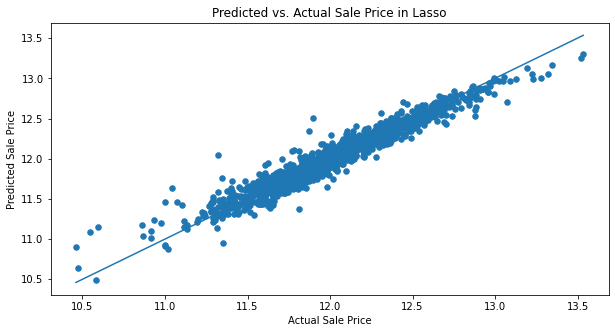

In [73]:
#plot Predicted vs. Actual Sale Price
plt.figure(figsize=(10, 5))
plt.scatter(y,pred, s=30)
plt.title('Predicted vs. Actual Sale Price in Lasso')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y), max(y)], [min(y), max(y)])
plt.show()

In [74]:
testprelasso=lasso.predict(test)
tst = pd.read_csv('test.csv')
test_ID = tst['Id']
import math

testlasso = []
for i in range(len(testprelasso)):
   testlasso.append((math.exp(testprelasso[i])- 1))
testlasso
sublasso = pd.DataFrame()
test_ID
sublasso['Id'] = test_ID
sublasso['SalePrice'] = testlasso
sublasso
sublasso.to_csv('lasso.csv', index=False)




## XGBoost

In [75]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.3, random_state=0)

In [76]:

X_test = X_test.astype('float64')
y_test = y_test.astype('float64')


In [77]:
#Searching best parameters with array of values, setting parameters, fit train data, make prediction, get RMSE and score

'''#parameters = {
    'n_estimators'      : [7300,7400,7500,7600,7700,7800],
     'learning_rate'     : [0.005,0.01,0.015,0.02],
    'max_depth'         : [3,4,5],
     'min_child_weight'  : [1,1.5,2],
     'gamma'             : [0.0,0.1],
    'reg_alpha'         : [0.88,0.89,0.9,0.91],
     'subsample'         : [0.1,0.2,0.3],
     'seed'              : [41,42,43],
     'reg_lamda'        : [0.0000005,0.000001]
}
'''

parameters = {
    'n_estimators'      : [7600],
     'learning_rate'     : [0.01],
    'max_depth'         : [4],
     'min_child_weight'  : [1.5],
     'gamma'             : [0.0],
    'reg_alpha'         : [0.9],
     'subsample'         : [0.2],
     'seed'              : [42],
     'reg_lamda'        : [0.0000005]
}

xgb = GridSearchCV(XGBRegressor(), parameters, n_jobs=-1, verbose=1)
xgb.fit(X_train, y_train)
pred=xgb.predict(X_test)
print(xgb.best_params_)
rmse=np.sqrt(mean_squared_error(y_test,pred))
print (rmse)
score=xgb.score(X_test,y_test)
print(score)



Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.7min finished


[18:46:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'gamma': 0.0, 'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 1.5, 'n_estimators': 7600, 'reg_alpha': 0.9, 'reg_lamda': 5e-07, 'seed': 42, 'subsample': 0.2}
0.11315201306405609
0.9242621521857428


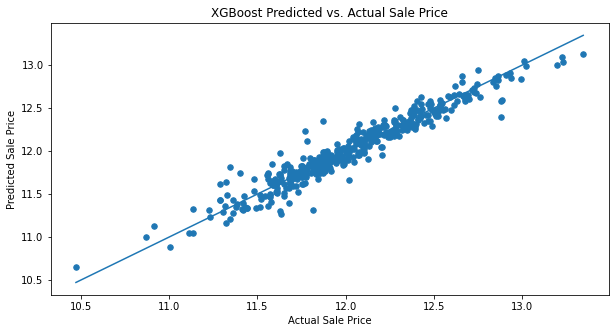

In [78]:
# #plot
plt.figure(figsize=(10, 5))
plt.scatter(y_test,pred, s=30) #Points of predicted vs actual prices
plt.title('XGBoost Predicted vs. Actual Sale Price')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.show()

In [79]:
#generate csv for submission
testprexgb=xgb.predict(test)
tst = pd.read_csv('test.csv')
test_ID = tst['Id']
import math

testxgb = []
for i in range(len(testprexgb)):
   testxgb.append((math.exp(testprexgb[i])- 1))
testxgb
subxgb = pd.DataFrame()
test_ID
subxgb['Id'] = test_ID
subxgb['SalePrice'] = testxgb
subxgb
subxgb.to_csv('xgb.csv', index=False)

## Support Vector Regression

In [80]:
from sklearn.svm import SVR


In [81]:
# I used these 3 different kinds of scalers to transform the train and test data, but it turned out that the submission without using any scaler got the best RMSE score.
# create robustscaler
#RobustScaler = RobustScaler()
# fit and transform in one step
#X2 = scaler.fit_transform(train)
#X3 = scaler.fit_transform(test)
#from sklearn.preprocessing import MinMaxScaler

#min_max_scaler = MinMaxScaler()

#X4 = min_max_scaler.fit_transform(train)
#X5 = min_max_scaler.fit_transform(test)

#StandardScaler = StandardScaler()
#StandardScaler.fit(X_train)
#X6 = StandardScaler.transform(train)
#X7 = StandardScaler.transform(test)

In [82]:
#Train_test_split for SVR
X1_train,X1_test, y1_train, y1_test =train_test_split(train, y, test_size=0.25, random_state=0)

In [83]:
#Generate the dictionary of hyperparameters
parameters = {
    'C' : [13,14,15],
    'gamma' : [ 0.0004,0.0005],
    'kernel' : ['rbf'],
    'epsilon': [0.0008,0.0009]    
}

In [84]:
#Use GridSearchCV to tune the hyperparameters
SVR = GridSearchCV(SVR(),parameters, n_jobs=-1, verbose=1)
SVR.fit(X1_train, y1_train)
SVR.preds = SVR.predict(X1_test)
rmse = np.sqrt(mean_squared_error(y1_test, SVR.preds))

print(rmse)
SVRscore=SVR.score(X1_test,y1_test)
print(SVRscore)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   21.0s finished


0.10995930182900125
0.9319831219572441


In [85]:
#print the best parameters combination
print (SVR.best_params_)

{'C': 14, 'epsilon': 0.0009, 'gamma': 0.0004, 'kernel': 'rbf'}


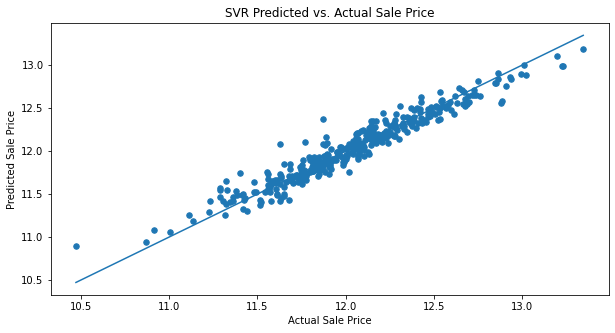

In [86]:
#plot the SVR predicted and the actual Sale Price
plt.figure(figsize=(10, 5))
plt.scatter(y1_test,SVR.preds, s=30)
plt.title('SVR Predicted vs. Actual Sale Price')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.show()

In [87]:
testpresvr=SVR.predict(test)
tst = pd.read_csv('test.csv')
test_ID = tst['Id']
import math

testsvr = []
for i in range(len(testpresvr)):
   testsvr.append((math.exp(testpresvr[i])- 1))
testsvr
subsvr = pd.DataFrame()
test_ID
subsvr['Id'] = test_ID
subsvr['SalePrice'] = testsvr
subsvr
subsvr.to_csv('svr.csv', index=False)


## Neural Network

In [88]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from tensorflow.keras import layers, Sequential
from keras.layers import Activation, Dense,Softmax, Dropout
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.wrappers.scikit_learn import KerasRegressor
from keras import regularizers

In [89]:
#convert data to float64 format
X_test = X_test.astype('float64')
y_test = y_test.astype('float64')

In [90]:
#==========================GridsearchCV=========================================
#step 1:design a Neural Network model
#step 2:select params
#step 3:using best parameters to fit dataset
#===============================================================================

def create_model(optimizer = 'adam'):
    input = Input(shape=(X_train.shape[1],))
    hidden_1 = Dense(512, activation = 'relu')(input)
    hidden_2 = Dense(64, activation = 'relu')(hidden_1)
    hidden_3 = Dense(16, activation = 'relu')(hidden_2)
    output = Dense(1, activation= 'linear')(hidden_3)
    model = Model(input,output)
    model.compile(optimizer = optimizer, loss='mse', metrics=[tf.keras.metrics.MeanSquaredError()])
    return model

In [91]:
#params to choose
optimizers = ['rmsprop', 'SGD','adam']
batches = [100, 200]
epochs=[50, 200]
param_grid = dict(batch_size=batches, optimizer=optimizers, epochs=epochs)
model2 = KerasRegressor(build_fn=create_model, verbose=0)
grid=GridSearchCV(estimator = model2, param_grid = param_grid)
grid_result = grid.fit(X_train, y_train)

In [92]:
#get best parameters
grid_result.best_params_

{'batch_size': 200, 'epochs': 200, 'optimizer': 'adam'}

In [93]:
#print best score
print(grid_result.best_score_)

-0.0284845519810915


In [94]:
#using keras Sequential to design a Neural Network model
model = Sequential()  # model initialization
model.add(Dense(units = 512,   # nodes number
                activation='relu',  # activation function
                input_shape=(X_train.shape[1],)  # input shape should be specified in the first layer
               )
         )

model.add(Dropout(0.01))  # drop neuron connections 

model.add(Dense(units = 64,
                kernel_regularizer=regularizers.l2(1.0),  #weight penalty 	
                activity_regularizer=regularizers.l1(0.2),  #activation penalty
                activation='relu' 
           )
 )

model.add(Dense(units = 16,
                kernel_regularizer=regularizers.l2(0.1),
                activation='relu' 
           )
 )

model.add(Dense(units = 1,   
                activation='linear'  # linear activation function using at the output layer  
               )
         )

print(model.summary())  # print Neural Network summary

model.compile(loss='mse',  # loss function is mean_squared_error
              optimizer='adam',  # optimizer
             )

history = model.fit(X_train, y_train,
          epochs=200,  # iteration times
          batch_size=200,  
          verbose=0
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_244 (Dense)            (None, 512)               144384    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_245 (Dense)            (None, 64)                32832     
_________________________________________________________________
dense_246 (Dense)            (None, 16)                1040      
_________________________________________________________________
dense_247 (Dense)            (None, 1)                 17        
Total params: 178,273
Trainable params: 178,273
Non-trainable params: 0
_________________________________________________________________
None


Text(0.5, 1.0, 'Neural Network loss plot')

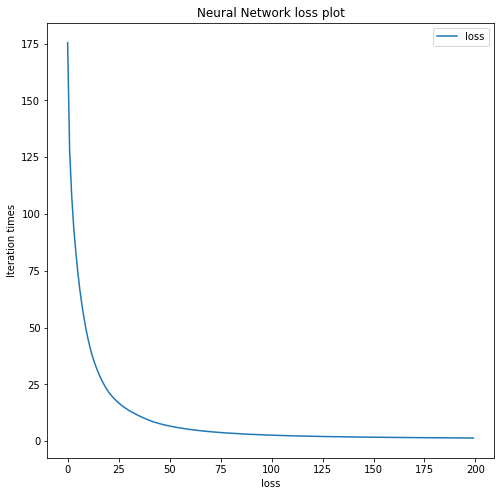

In [95]:
#plot loss
loss_df = pd.DataFrame(model.history.history)

ax = loss_df.plot(figsize=(8,8))
ax.set_xlabel('loss')
ax.set_ylabel('Iteration times')
ax.set_title('Neural Network loss plot')

In [96]:
#print model evaluate result
model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 2ms/step - loss: 1.3573


1.357260823249817

In [97]:
#print rmse
pred = model.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,pred))
print (rmse)

0.13662830303168977




## Models Average Stacking

Since Xgboost and Lasso Regression worked the best in submission, SVR worked best in train and third in submission. I try to stack these 3 models by giving them weights at 0.4, 0.4, 0.2 by the following code and get an excellent RMSE then generate a csv for submission.

In [98]:
class AverageWeight(BaseEstimator, RegressorMixin):
    def __init__(self,models,weight):
        self.models = models
        self.weight = weight
        
    def fit(self,train,y):
        self.models_ = [clone(x) for x in self.models]
        for model in self.models_:
            model.fit(train,y)
        return self
    
    def predict(self,train):
        w = list()
        pred = np.array([model.predict(train) for model in self.models_])
        # For each model, their predictions mutiplied with their weights would be the final prediction
        for data in range(pred.shape[1]):
            single = [pred[model,data]*weight for model,weight in zip(range(pred.shape[0]),self.weight)]
            w.append(np.sum(single))
        return w 

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [100]:
Lasso1 = Lasso(alpha=0.0005,max_iter=10000)
XGB1 = XGBRegressor(n_estimators=7600,learning_rate=0.01,max_depth=4,min_child_weight=1.5,gamma=0.0,reg_alpha=0.9,subsample=0.2,seed=42,reg_lamda=0.0000005)
SVR1 = SVR(gamma= 0.0004,kernel='rbf',C=14,epsilon=0.0009)

In [101]:
w1 = 0.4
w2 = 0.4
w3 = 0.2

In [102]:
weight_avg = AverageWeight(models = [Lasso1,XGB1,SVR1],weight=[w1,w2,w3])

In [103]:
def rmse_cv(model,train,y):
    rmse = np.sqrt(-cross_val_score(model, train, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

In [104]:
score_average = rmse_cv(weight_avg,train,y)
print(score_average.mean())

[18:53:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:54:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:55:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:56:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.11011384637424311


In [105]:
Lasso1.fit(train,y)
XGB1.fit(train,y)
SVR1.fit(train,y)

[18:58:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


SVR(C=14, cache_size=200, coef0=0.0, degree=3, epsilon=0.0009, gamma=0.0004,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [106]:
#Generate the submission version of averaged models
#It got a RMSE 0.11993 in kaggle, ranked 570th, top 7% in the leaderboard 
testpreAVR=Lasso1.predict(test)*0.4+XGB1.predict(test)*0.4+SVR1.predict(test)*0.2
tst = pd.read_csv('test.csv')
test_ID = tst['Id']
import math

testAVR = []
for i in range(len(testpreAVR)):
   testAVR.append((math.exp(testpreAVR[i])- 1))
testAVR
subAVR = pd.DataFrame()
test_ID
subAVR['Id'] = test_ID
subAVR['SalePrice'] = testAVR
subAVR
subAVR.to_csv('AVR.csv', index=False)